In [1]:
#first of all,of course import torch
import torch

In [3]:
#create a bunch of different shape tensors
#tensors are just like numpy matrices, just the computation is faster due to optimization under the hood
t1 = torch.tensor(1.)
t1

tensor(1.)

In [7]:
#always try to create floating point dtype tensors, int may cause loss of info due to rounding up
t1.dtype

torch.float32

In [8]:
t1.shape

torch.Size([])

In [10]:
t1 = torch.tensor([[2,3,4,5],[1,2,3,4]])

In [11]:
t1.shape

torch.Size([2, 4])

In [12]:
#you can also create tensor from numpy array
import numpy as np

In [14]:
arr = np.random.rand(2,3)

In [16]:
type(arr)

numpy.ndarray

In [17]:
arr = torch.from_numpy(arr)

In [18]:
type(arr)

torch.Tensor

In [19]:
#creating like this is no different from creating numpy arrays, 
#if tensor is to be used for learning, it needs to be 'gradientable', i.e. it should change acc. to loss function computed
#let's try with a simple y = w*x+b line 
x = torch.tensor(2.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(0.5, requires_grad=True)

In [20]:
y = w*x+b

In [21]:
y

tensor(8.5000, grad_fn=<AddBackward0>)

In [22]:
#to compute derivatives of y w.r.t all the variables
y.backward()

In [24]:
#now gradients are stored in the .grad property of the tensors. if requires_grad=False, then gradient=0
print(x.grad) #dy/dx
print(w.grad) #dy/dw
print(b.grad) #dy/db

None
tensor(2.)
tensor(1.)


In [28]:
np.random.randint(3,5,(3,4))

array([[4, 3, 3, 4],
       [4, 3, 3, 4],
       [3, 4, 3, 3]])

In [29]:
#now for some linear regression using pytorch built-in linear model
import pandas as pd

In [56]:
#I'll be using the Appliances Energy dataset that I used in my MLND Capstone project
#you can see my full regression notebook there with feature analysis and everything else
data = pd.read_csv('EnergyData.csv',nrows=1000)

In [84]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [85]:
#this won't be complete in any way, I'll just take couple columns and the target variable Appliances
#as the main purpose is to learn how to use the pytorch nn linear module
temp_cols = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
target = ["Appliances"]

In [86]:
inputs = data[temp_cols]
target = data[target]

array([[<AxesSubplot:title={'center':'T1'}>,
        <AxesSubplot:title={'center':'T2'}>,
        <AxesSubplot:title={'center':'T3'}>],
       [<AxesSubplot:title={'center':'T4'}>,
        <AxesSubplot:title={'center':'T5'}>,
        <AxesSubplot:title={'center':'T6'}>],
       [<AxesSubplot:title={'center':'T7'}>,
        <AxesSubplot:title={'center':'T8'}>,
        <AxesSubplot:title={'center':'T9'}>]], dtype=object)

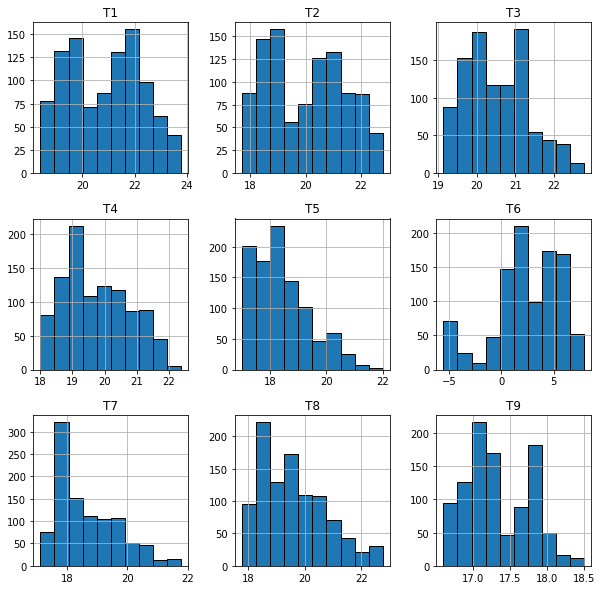

In [87]:
inputs.hist(figsize=(10,10),bins=10,edgecolor='black')

array([[<AxesSubplot:title={'center':'Appliances'}>]], dtype=object)

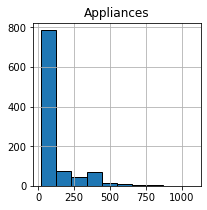

In [88]:
target.hist(figsize=(3,3),bins=10,edgecolor='black')

In [89]:
#convert to numpy to convert to tensor next
inputs = torch.from_numpy(inputs.to_numpy().astype(np.float32))
target = torch.from_numpy(target.to_numpy().astype(np.float32))

In [90]:
inputs.dtype

torch.float32

In [91]:
from torch.utils.data import TensorDataset

In [92]:
trainDataset = TensorDataset(inputs,target)

In [93]:
#now we can index the dataset in (input,output) tensor pairs
trainDataset[0:5]

(tensor([[19.8900, 19.2000, 19.7900, 19.0000, 17.1667,  7.0267, 17.2000, 18.2000,
          17.0333],
         [19.8900, 19.2000, 19.7900, 19.0000, 17.1667,  6.8333, 17.2000, 18.2000,
          17.0667],
         [19.8900, 19.2000, 19.7900, 18.9267, 17.1667,  6.5600, 17.2000, 18.2000,
          17.0000],
         [19.8900, 19.2000, 19.7900, 18.8900, 17.1667,  6.4333, 17.1333, 18.1000,
          17.0000],
         [19.8900, 19.2000, 19.7900, 18.8900, 17.2000,  6.3667, 17.2000, 18.1000,
          17.0000]]),
 tensor([[60.],
         [60.],
         [50.],
         [50.],
         [60.]]))

In [94]:
#now create a Data Loader that'll take the dataset and feed to the model in BATCHES
from torch.utils.data import DataLoader

In [95]:
batch_size = 10
trainDataLoader = DataLoader(trainDataset, batch_size,shuffle=True)

In [96]:
#now for the model 
import torch.nn as nn

In [97]:
model = nn.Linear(9,1)  #9 input vars and 1 output

In [98]:
model.weight

Parameter containing:
tensor([[-0.0133, -0.1624,  0.1753, -0.1414,  0.0699,  0.3168,  0.3139, -0.2876,
          0.2381]], requires_grad=True)

In [99]:
model.bias

Parameter containing:
tensor([0.1458], requires_grad=True)

In [100]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0133, -0.1624,  0.1753, -0.1414,  0.0699,  0.3168,  0.3139, -0.2876,
           0.2381]], requires_grad=True),
 Parameter containing:
 tensor([0.1458], requires_grad=True)]

In [101]:
preds = model(inputs)

In [107]:
preds[:10]

tensor([[5.1941],
        [5.1408],
        [5.0487],
        [5.0216],
        [5.0237],
        [4.9770],
        [4.9631],
        [4.9193],
        [4.9246],
        [4.9563]], grad_fn=<SliceBackward>)

In [106]:
target[:10]

tensor([[60.],
        [60.],
        [50.],
        [50.],
        [60.],
        [50.],
        [60.],
        [60.],
        [60.],
        [70.]])

In [108]:
#currently the predictions are way off
#now we need a loss function and some optimizer
import torch.nn.functional as F

In [110]:
lossFunc = F.mse_loss

In [112]:
loss = lossFunc(model(inputs),target)
loss

tensor(29486.3438, grad_fn=<MseLossBackward>)

In [113]:
optim = torch.optim.SGD(model.parameters(),lr=1e-5)

In [122]:
def train(num_epochs, model, lossFunc, optim, trainDataLoader):
    for epoch in range(num_epochs): #epoch is one pass through whole data, so all batches loaded once per epoch
        for x,y in trainDataLoader: #load the batches via data loader one by one
            #get pred
            pred = model(x)
            
            #get loss
            loss = lossFunc(pred,y)
            
            #compute gradients
            loss.backward()
            
            #optimize or update params using the gradients
            optim.step()
            
            #reset gradients to zero before next batch, otherwise gradients will be accumulated 
            optim.zero_grad()
        if (epoch+1)%100==0:
            print(f"Epoch No. {epoch+1}, loss:{loss}")
            

In [123]:
#now train for 900 epochs
train(900,model,lossFunc,optim,trainDataLoader)

Epoch No. 100, loss:23162.384765625
Epoch No. 200, loss:15328.732421875
Epoch No. 300, loss:10695.0576171875
Epoch No. 400, loss:5971.541015625
Epoch No. 500, loss:2941.92626953125
Epoch No. 600, loss:12790.3134765625
Epoch No. 700, loss:38093.4375
Epoch No. 800, loss:19240.796875
Epoch No. 900, loss:3099.289306640625


In [124]:
#the loss is not converging as no feature engineering done, see my other notebook in MLND_Capstone for that
preds = model(inputs[:10])

In [125]:
preds

tensor([[108.2987],
        [108.0600],
        [107.5054],
        [107.4142],
        [106.6477],
        [107.9880],
        [108.4900],
        [108.2737],
        [107.5127],
        [108.7702]], grad_fn=<AddmmBackward>)

In [126]:
target[:10]

tensor([[60.],
        [60.],
        [50.],
        [50.],
        [60.],
        [50.],
        [60.],
        [60.],
        [60.],
        [70.]])

## so the model is not useful yet, but that wasn't the purpose now was it
## Now you know the basic elements for any model are
### 1. DataLoader
### 2. model from torch.nn
### 3. Loss function
### 4. Optimizer to apply the loss 

In [127]:
#I'm a noob myself so this is basically just me talking to myself and learning along the way